In [1]:
import pandas as pd
from ollama import chat
from ollama import ChatResponse
from tqdm import tqdm

In [3]:
df = pd.read_csv('../Drug-ATC.csv')
SMILES = df['Neutralized SMILES']
ATC4 = df['ATC Codes']

In [3]:
s_smiles = SMILES[1].replace("\\", "\\\\") #L02AE
print(s_smiles)
response: ChatResponse = chat(model='atc4-predictor3', messages=[
    {"role": "user", "content": s_smiles}
])
print(response['message']['content'])

CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)[C@H](CO)NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](Cc1cnc[nH]1)NC(=O)[C@@H]1CCC(=O)N1)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@H]1C(=O)NNC(N)=O
A07AA08


In [4]:
import asyncio
from ollama import AsyncClient

async def chat():
    message = {'role': 'user', 'content': SMILES[24].replace("\\", "\\\\")}
    response = await AsyncClient().chat(model='atc4-predictor3', messages=[message])
    print(response['message']['content'])

await chat()

M05AB01


In [ ]:
if "predicted_atc4" not in df.columns:
    df["predicted_atc4"] = None
import asyncio
from ollama import AsyncClient

async def chat(message):
    response = await AsyncClient().chat(model='atc4-predictor3', messages=message)
    return response['message']['content']

for i in range(len(df)):
    smiles = df.at[i, "Neutralized SMILES"]
    s_smiles = smiles.replace("\\", "\\\\")
    message=[
        {"role": "user", "content": s_smiles}
    ]
    try:
      pred = await chat(message)
    except ollama.ResponseError as e:
      print('Error:', e.error)
      if e.status_code == 404:
        ollama.pull(model)
    print(pred)
    df.at[i, "predicted_atc4"] = pred

    if i % 10 == 0:
        df.to_csv("predicted_atc4_partial.csv", index=False)
        print("Guardado parcial")

df.to_csv("predicted_atc4_1.csv", index=False)

In [ ]:
response: ChatResponse = chat(model='atc4-predictor3', messages=[
    {'role': 'user', 'content': 'Cc1ncc(COP(=O)(O)O)c(C=O)c1O'},
    {'role': 'user', 'content': 'O=C(O)CCCC[C@@H]1CCSS1'}
])

print(response['message']['content'])

In [ ]:
response: ChatResponse = chat(model='atc4-predictor3', messages=[
    {'role': 'user', 'content': 'NCCCC[C@H](N)C(=O)O'},
])

print(response['message']['content'])

In [ ]:
response: ChatResponse = chat(model='atc4-predictor3', messages=[
    {'role': 'user', 'content': 'C/C1=C2/N=C(/C=C3\\N=C(/C(C)=C4/[C@@H](CCC(N)=O)[C@](C)(CC(N)=O)[C@](C)([C@@H]5N=C1[C@](C)(CCC(=O)NC[C@@H](C)OP(=O)([O-])O[C@H]1[C@@H](O)[C@@H](n6cnc7cc(C)c(C)cc76)O[C@@H]1CO)[C@H]5CC(N)=O)N4[Co+]C#N)[C@@](C)(CC(N)=O)[C@@H]3CCC(N)=O)C(C)(C)[C@@H]2CCC(N)=O'},
])

print(response['message']['content'])

In [4]:
preds = pd.read_csv('../predicted_atc4_1.csv')
preds = preds['predicted_atc4']

In [5]:
preds

0       A07BA02
1       A07AA08
2       J06BA08
3       A07AA07
4       J05AA03
         ...   
3584    A07BA07
3585    A02AB01
3586    A01AA07
3587    M05AB02
3588    A07EA07
Name: predicted_atc4, Length: 3589, dtype: object

In [6]:
# Convert a string that simulates a list to a real list
def convert_string_list(element):
    # Delete [] of the string
    element = element[0:len(element)]
    # Create a list that contains each code as e.g. 'A'
    ATC_list = list(element.split('; '))
    for index, code in enumerate(ATC_list):
        # Delete '' of the code
        ATC_list[index] = code[0:len(code)]
    return ATC_list

In [7]:
clear_preds = []
for i, pred in enumerate(preds):
    level4_pred = pred[0:5]
    if len(level4_pred) == 5:
        if level4_pred[0].isalpha():
            if level4_pred[1:3].isnumeric():
                if level4_pred[3].isalpha():
                    if level4_pred[4].isalpha():
                        clear_preds.append(level4_pred)
                    else:
                        clear_preds.append("Invalid prediction")
                else:
                    clear_preds.append("Invalid prediction")
            else:
                clear_preds.append("Invalid prediction")    
        else:
            clear_preds.append("Invalid prediction")
    else:
        clear_preds.append("Invalid prediction")
clear_preds

['A07BA',
 'A07AA',
 'J06BA',
 'A07AA',
 'J05AA',
 'A07AA',
 'A07AA',
 'A07AA',
 'A07AA',
 'J06BA',
 'Invalid prediction',
 'A07AA',
 'A07AA',
 'J01AA',
 'A01AA',
 'A07AA',
 'A01AA',
 'A01AA',
 'A07AA',
 'A01AA',
 'M01AA',
 'A01AA',
 'M05AA',
 'A07BA',
 'M05AA',
 'A07BA',
 'A09AA',
 'M05AA',
 'M01AA',
 'J05BA',
 'J01AA',
 'M05AA',
 'A07AA',
 'A01AA',
 'J05AA',
 'M01AA',
 'M01AA',
 'Invalid prediction',
 'M01AA',
 'A07BC',
 'A07AA',
 'Invalid prediction',
 'M01AA',
 'A02AA',
 'M01AA',
 'Invalid prediction',
 'M01AA',
 'A07AA',
 'M05AB',
 'A07AA',
 'J05BA',
 'A07AA',
 'A07AA',
 'A07AA',
 'Invalid prediction',
 'Invalid prediction',
 'A07BC',
 'A07AA',
 'J05BA',
 'A01AA',
 'E14AA',
 'J01AA',
 'A07BC',
 'M01AA',
 'A07BA',
 'Invalid prediction',
 'M05AA',
 'A07AA',
 'J05BA',
 'M05AB',
 'A07AA',
 'A07AA',
 'Invalid prediction',
 'J05AA',
 'A07AA',
 'J01AA',
 'D06AA',
 'A07AA',
 'J01AA',
 'M01AA',
 'A07AA',
 'M01AA',
 'A07BA',
 'A07AA',
 'A07AA',
 'J01AA',
 'M01AA',
 'J05AA',
 'A07AA',
 'M01A

In [8]:
print(clear_preds.count("Invalid prediction"))
print(len(clear_preds)-clear_preds.count("Invalid prediction"))

491
3098


In [9]:
import matplotlib.pyplot as plt
from collections import defaultdict
# Create a dictionary of integers
counter = defaultdict(int)

for pred in clear_preds:
    # ATC_level1_list = convert_string_list(row['ATC_level1'])
    if pred != "Invalid prediction":
        counter[pred] += 1
counter

defaultdict(int,
            {'A07BA': 457,
             'A07AA': 628,
             'J06BA': 5,
             'J05AA': 112,
             'J01AA': 327,
             'A01AA': 182,
             'M01AA': 365,
             'M05AA': 138,
             'A09AA': 41,
             'J05BA': 87,
             'A07BC': 124,
             'A02AA': 69,
             'M05AB': 68,
             'E14AA': 2,
             'D06AA': 63,
             'A01EA': 42,
             'J15AA': 105,
             'T03AA': 2,
             'E17AA': 27,
             'A35EA': 2,
             'J16AA': 24,
             'J04AA': 17,
             'N06AA': 11,
             'J17AA': 25,
             'J11AA': 11,
             'J16AJ': 2,
             'D07AA': 5,
             'A09AB': 2,
             'A01DB': 1,
             'H01AA': 17,
             'M01AB': 12,
             'U01AA': 8,
             'A08AA': 13,
             'E13AA': 5,
             'N03AA': 5,
             'N06AX': 2,
             'D06AX': 1,
             'E19AA': 2,


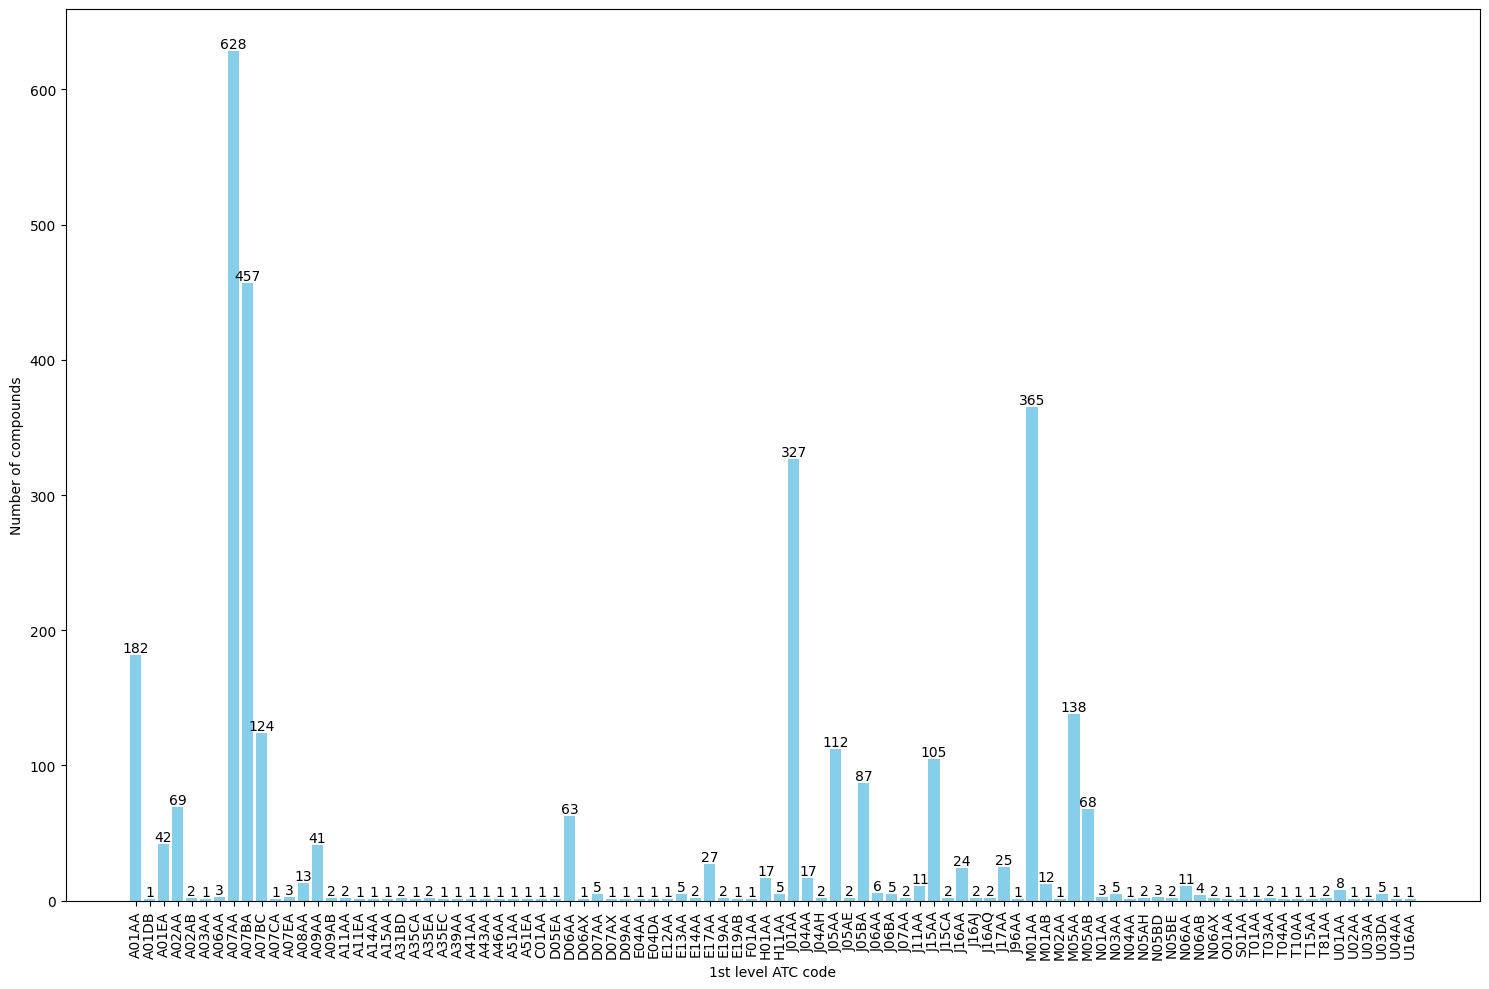

In [10]:
dict_level1 = dict(sorted(counter.items()))

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

for code, num in dict_level1.items():
    p = ax.bar(code, num, color='skyblue')
    ax.bar_label(p)
    
plt.xlabel('1st level ATC code')
plt.ylabel('Number of compounds')
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig('1stlevel.png', bbox_inches='tight')

In [12]:
df_test = pd.read_csv('../Drug-ATC.csv')
df_test['ATC Codes']
# valid_indices = [i for i, pred in enumerate(clear_preds) if pred != "Invalid prediction"]

# clear_preds = [clear_preds[i] for i in valid_indices]
# df_test = df_test.iloc[valid_indices].reset_index(drop=True)

0       B01AE
1       L02AE
2       R02AB
3       H01BA
4       H01CC
        ...  
3584    A06AB
3585    A06AB
3586    A06AC
3587    A06AC
3588    A06AC
Name: ATC Codes, Length: 3589, dtype: object

In [13]:
df_test

,DB Accession Number,Molecule Names,ATC Codes,Type,Groups,DB SMILES,Neutralized SMILES
0,DB00006,Bivalirudin,B01AE,Small Molecule,NotAvailable,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...
1,DB00014,Goserelin,L02AE,Small Molecule,NotAvailable,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...
2,DB00027,Gramicidin D,R02AB,Small Molecule,NotAvailable,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...
3,DB00035,Desmopressin,H01BA,Small Molecule,NotAvailable,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,N=C(N)NCCC[C@@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...
4,DB00050,Cetrorelix,H01CC,Small Molecule,NotAvailable,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...
...,...,...,...,...,...,...,...
3584,JUAN879,SEN 215,A06AB,Small Molecule,NotAvailable,CC=C1CC2CNC3=CC(=C(C=C3C(=O)N2C1)OC)O,CC=C1CC2CNc3cc(O)c(OC)cc3C(=O)N2C1
3585,JUAN881,Tritriacontanoic acid,A06AB,Small Molecule,NotAvailable,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(=O)O,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(=O)O
3586,JUAN882,Sterculic acid,A06AC,Small Molecule,NotAvailable,CCCCCCCCC1=C(C1)CCCCCCCC(=O)O,CCCCCCCCC1=C(CCCCCCCC(=O)O)C1
3587,JUAN883,Methylcellulose,A06AC,Small Molecule,NotAvailable,COCC1C(C(C(C(O1)OC2C(OC(C(C2OC)OC)OC3C(OC(C(C3...,COCC1OC(OC2C(COC)OC(OC3C(COC)OC(OC)C(OC)C3OC)C...


In [14]:
# for i, pred in enumerate(clear_preds):
#     if pred == "Invalid prediction":
#         print(pred)

In [15]:
len(clear_preds)

3589

In [16]:
def precision(output_beam2, df_test):
    total_compounds = len(df_test)
    # Initialize counters for total matches and valid comparisons at each level
    total_matches = [0, 0, 0, 0]
    valid_comparisons = [total_compounds] * 4 # Start with all compounds being valid for comparison at every level

    # Iterate through the predictions for each compound
    for i, list_preds in enumerate(output_beam2):
        true_codes = df_test['ATC Codes'].iloc[i]
        true_codes = convert_string_list(true_codes)
        num_preds = [len(list_preds)]*4
        level_matches = [0, 0, 0, 0]
        not_compared = [False, True, True, True]
        # Compare predicted codes with true codes
        match_found = [False, False, False, False]
        p = list_preds
        for true_code in true_codes:
            # Compare each level
            if len(p) == 5:
                if p[0] == true_code[0]:
                    match_found[0] = True
                    if p[1:3] == true_code[1:3]:
                        match_found[1] = True
                        if p[3] == true_code[3]:
                            match_found[2] = True
                            if p[4] == true_code[4]:
                                match_found[3] = True
            for level in range(4):
                if match_found[level]:
                    # If at least one time it can compare with level y+1 so it converts to False
                    # Level y has matched so it compares to level y+1
                    level_matches[level] += 1
                    if level+1 < 4:
                        not_compared[level+1] = False
                else:
                     if level+1 < 4:
                        num_preds[level+1] -= 1
        valid_comparisons = [valid_comparisons[level] - int(not_compared[level]) for level in range(4)]
        total_matches = [total_matches[level] + ((level_matches[level]/num_preds[level]) if num_preds[level] > 0 else 0) for level in range(4)]
        
    precisions = [total_matches[level] / valid_comparisons[level] if valid_comparisons[level] > 0 else 0 for level in range(4)]
    
    precision_1 = precisions[0] * 100
    precision_2 = precisions[1] * 100
    precision_3 = precisions[2] * 100
    precision_4 = precisions[3] * 100
    return precision_1, precision_2, precision_3, precision_4

In [17]:
def recall(output_beam2, df_test):
    # Load test dataset and initialize counters
    total_compounds = len(df_test)
    # Initialize counters for total matches and valid comparisons at each level
    total_matches = [0, 0, 0, 0]
    valid_comparisons = [total_compounds] * 4 # Start with all compounds being valid for comparison at every level

    # Iterate through the predictions for each compound
    for i, list_preds in enumerate(output_beam2):
        true_codes = df_test['ATC Codes'].iloc[i]
        true_codes = convert_string_list(true_codes)
        num_true_codes = [len(true_codes)]*4
        level_matches = [0, 0, 0, 0]
        not_compared = [False, True, True, True]
        # Compare true codes with predicted codes
        for true_code in true_codes:
            match_found = [False, False, False, False]
            p = list_preds
            # Compare each level
            if len(p) == 5:
                if p[0] == true_code[0]:
                    match_found[0] = True
                    if p[1:3] == true_code[1:3]:
                        match_found[1] = True
                        if p[3] == true_code[3]:
                            match_found[2] = True
                            if p[4] == true_code[4]:
                                match_found[3] = True
            for level in range(4):
                if match_found[level]:
                    # If at least one time it can compare with level y+1 so it converts to False
                    # Level y has matched so it compares to level y+1
                    level_matches[level] += 1
                    if level+1 < 4:
                        not_compared[level+1] = False
                else:
                    if level+1 < 4:
                        num_true_codes[level+1] -= 1
        # For compound x it couldn't compare at level i so it has to decrease the amount of comparisons at level i for compound x
        valid_comparisons = [valid_comparisons[level] - int(not_compared[level]) for level in range(4)]
        total_matches = [total_matches[level] + ((level_matches[level]/num_true_codes[level]) if num_true_codes[level] > 0 else 0) for level in range(4)]
        
    recalls = [(total_matches[level] / valid_comparisons[level]) if valid_comparisons[level] > 0 else 0 for level in range(4)]
    
    recall_1 = recalls[0] * 100
    recall_2 = recalls[1] * 100
    recall_3 = recalls[2] * 100
    recall_4 = recalls[3] * 100
    return recall_1, recall_2, recall_3, recall_4

In [18]:
precision_1, precision_2, precision_3, precision_4 = precision(clear_preds, df_test)
recall_1, recall_2, recall_3, recall_4 = recall(clear_preds, df_test)

In [19]:
print(f"Precision level 1: {precision_1}")
print(f"Precision level 2: {precision_2}")
print(f"Precision level 3: {precision_3}")
print(f"Precision level 4: {precision_4}")

Precision level 1: 3.544162719420475
Precision level 2: 7.350835322195695
Precision level 3: 17.267441860465105
Precision level 4: 5.340909090909092


In [20]:
print(f"Recall level 1: {recall_1}")
print(f"Recall level 2: {recall_2}")
print(f"Recall level 3: {recall_3}")
print(f"Recall level 4: {recall_4}")

Recall level 1: 10.048196207990022
Recall level 2: 19.451073985680193
Recall level 3: 51.162790697674424
Recall level 4: 11.363636363636363


In [80]:
df_test

,DB Accession Number,Molecule Names,ATC Codes,Type,Groups,DB SMILES,Neutralized SMILES
0,DB00006,Bivalirudin,B01AE,Small Molecule,NotAvailable,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...
1,DB00014,Goserelin,L02AE,Small Molecule,NotAvailable,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...
2,DB00027,Gramicidin D,R02AB,Small Molecule,NotAvailable,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...
3,DB00035,Desmopressin,H01BA,Small Molecule,NotAvailable,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,N=C(N)NCCC[C@@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...
4,DB00050,Cetrorelix,H01CC,Small Molecule,NotAvailable,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...
...,...,...,...,...,...,...,...
3584,JUAN879,SEN 215,A06AB,Small Molecule,NotAvailable,CC=C1CC2CNC3=CC(=C(C=C3C(=O)N2C1)OC)O,CC=C1CC2CNc3cc(O)c(OC)cc3C(=O)N2C1
3585,JUAN881,Tritriacontanoic acid,A06AB,Small Molecule,NotAvailable,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(=O)O,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(=O)O
3586,JUAN882,Sterculic acid,A06AC,Small Molecule,NotAvailable,CCCCCCCCC1=C(C1)CCCCCCCC(=O)O,CCCCCCCCC1=C(CCCCCCCC(=O)O)C1
3587,JUAN883,Methylcellulose,A06AC,Small Molecule,NotAvailable,COCC1C(C(C(C(O1)OC2C(OC(C(C2OC)OC)OC3C(OC(C(C3...,COCC1OC(OC2C(COC)OC(OC3C(COC)OC(OC)C(OC)C3OC)C...


In [81]:
def metrics_calc(output_beam2, df_test):
    precisions = []
    recalls = []
    f1s = []
    from sklearn import metrics
    for i, preds in enumerate(output_beam2):
        ground_truth = convert_string_list(df_test['ATC Codes'].iloc[i])
        binary_predictions = []
        binary_ground_truth = []
        set_pred_gt = list(set([preds] + ground_truth))
        print(set_pred_gt)
        for code in set_pred_gt:
            if code in preds:
                binary_predictions.append(1)
            else:
                binary_predictions.append(0)
            if code in ground_truth:
                binary_ground_truth.append(1)
            else:
                binary_ground_truth.append(0)    
        precisions.append(metrics.precision_score(binary_ground_truth, binary_predictions))
        recalls.append(metrics.recall_score(binary_ground_truth, binary_predictions))
        f1s.append(metrics.f1_score(binary_ground_truth, binary_predictions))
    return precisions, recalls, f1s

In [82]:
precisions, recalls, f1s = metrics_calc(clear_preds, df_test)

['B01AE', 'A07BA']
['A07AA', 'L02AE']
['R02AB', 'J06BA']
['A07AA', 'H01BA']
['J05AA', 'H01CC']
['A07AA', 'J01XX']
['A07AA', 'L04AD', 'S01XA']
['A07AA', 'L02BX']
['A07AA', 'A11HA']
['B03BA', 'J06BA', 'B03AE']
['Invalid prediction', 'A16AA']
['A07AA', 'A11HA']
['A07AA', 'B05XB']
['A11GB', 'A11GA', 'G01AD', 'J01AA', 'S01XA']
['A01AA', 'A05BA']
['A07AA', 'A16AA']
['A01AA', 'D05AX', 'A11CC']
['A01AA', 'S01XA', 'A11HA']
['A07AA', 'A09AB']
['A01AA', 'H05BX', 'A11CC']
['N06AX', 'M01AA']
['A11DA', 'A01AA']
['M05AA', 'A11CC']
['B03AD', 'B03BB', 'A07BA', 'B03AE']
['R01AX', 'A11CA', 'D10AD', 'M05AA', 'S01XA']
['J04AM', 'J04AC', 'A07BA', 'N05AL', 'A11HA']
['A09AA', 'A16AX']
['M05BX', 'M05AA', 'A11CC', 'M05BB']
['B02BA', 'M01AA']
['C10AA', 'J05BA', 'C10BX', 'C10BA']
['N06AB', 'J01AA']
['C10BX', 'C09DB', 'C09DA', 'C09DX', 'M05AA', 'C09CA']
['C09BA', 'C09BX', 'C10BX', 'C09AA', 'A07AA', 'C09BB']
['L01XX', 'A01AA']
['J05AA', 'R01AD', 'R03BA']
['M03BX', 'M01AA']
['N06BA', 'M01AA']
['N07BA', 'Invalid pred

In [83]:
precisions

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [84]:
recalls

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [85]:
f1s

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [86]:
precisions_average = sum(precisions)/len(precisions)
recalls_average = sum(recalls)/len(recalls)
f1s_average = sum(f1s)/len(f1s)

In [87]:
print(precisions_average)
print(recalls_average)
print(f1s_average)

0.0013931457230426303
0.0009612705488994149
0.001040215473205164
